# 타이타닉

## 78% accuracy

* passengerId = 승객번호
* survival 
* pclass = 티켓 클래스
* name
* sex = 성
* age = 나이
* sibsp = 배에 탄 형제나 배우자의 수
* parch = 배에 탄 부모나 자식의 수 
* ticket = 티켓 번호
* fare = 낸 돈
* cabin = 객실 번호 
* embarked = 승선 한 항구 ( C = Cherbourg, Q = Queenstown, S = Southampton)

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv('./data/train.csv')
X_test = pd.read_csv('./data/test.csv')
test_PassengerId = X_test['PassengerId']


# 1. 데이터 탐색

In [51]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 데이터 타입 검사

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 1.2 간단한 통계 정보 

In [53]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.3 시각화

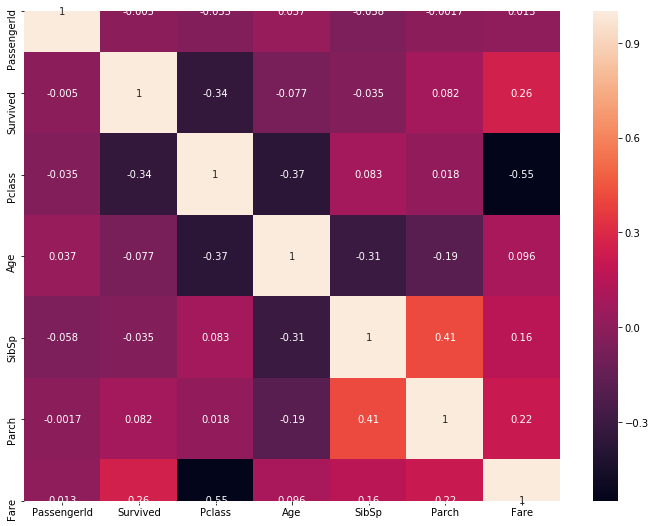

In [54]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


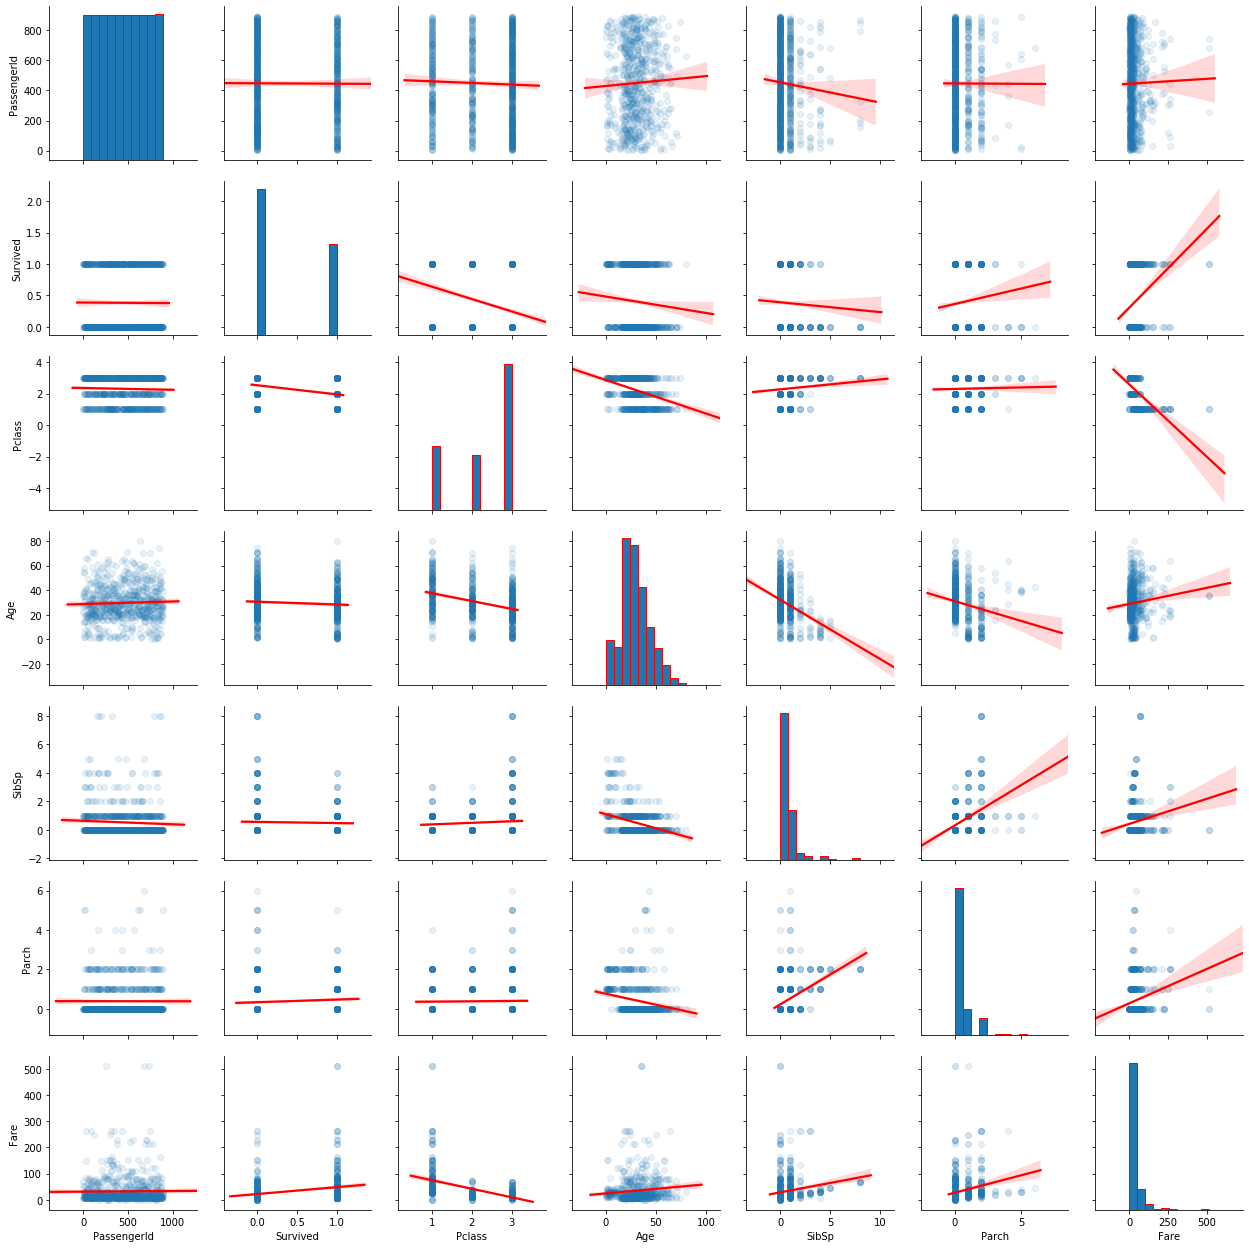

In [55]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

print(numerical_features)
print(categorical_features)


sns.pairplot(data[numerical_features] ,   kind='reg', 
             diag_kws={'edgecolor':'r'} , plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

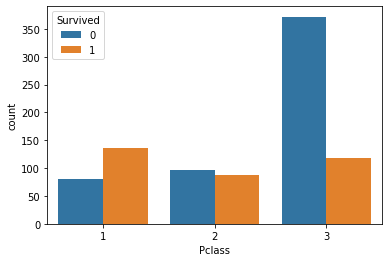

In [56]:
sns.countplot('Pclass',hue='Survived',data=data)

In [57]:
All_train = data

survived = All_train.loc[All_train['Survived']==1]
dead = All_train.loc[All_train['Survived']==0]


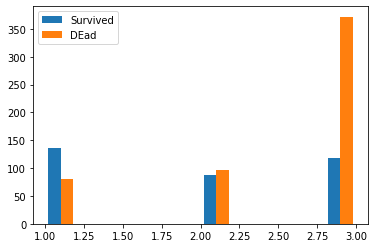

In [58]:
plt.hist([survived['Pclass'] , dead['Pclass']])
plt.legend(['Survived' , 'DEad'])
plt.show()

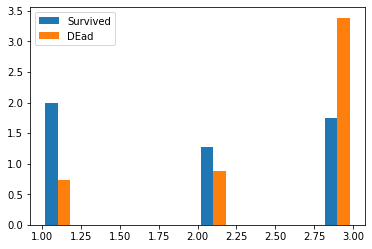

In [59]:
plt.hist([survived['Pclass'], dead['Pclass']] , density = True)
plt.legend(['Survived' , 'DEad'])
plt.show()

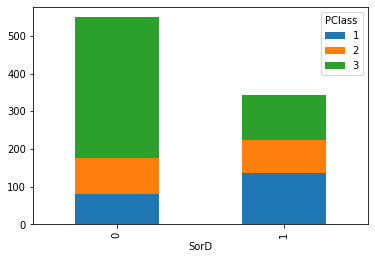

In [60]:
df = pd.DataFrame({'SorD':All_train['Survived'],'PClass':All_train['Pclass']}) 
ct = pd.crosstab(df.SorD, df.PClass) 

ct.plot.bar(stacked=True) 

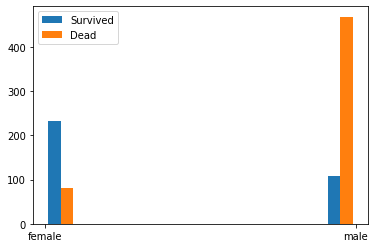

In [61]:
plt.hist([survived['Sex'] , dead['Sex']] )
plt.legend(['Survived' , 'Dead'])
plt.show()


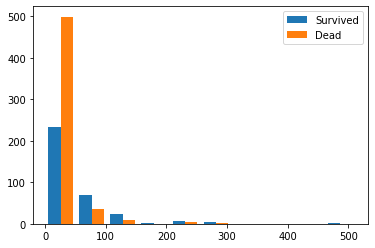

In [62]:
plt.hist([survived['Fare'] , dead['Fare']] )
plt.legend(['Survived' , 'Dead'])
plt.show()

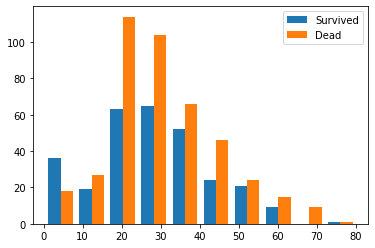

In [63]:
plt.hist([survived['Age'] , dead['Age']])
plt.legend(['Survived' , 'Dead'])
plt.show()

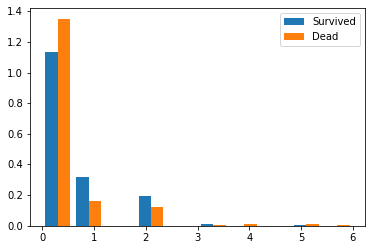

In [64]:
plt.hist([survived['Parch'] , dead['Parch']]  , density = True)
plt.legend(['Survived' , 'Dead'])
plt.show()

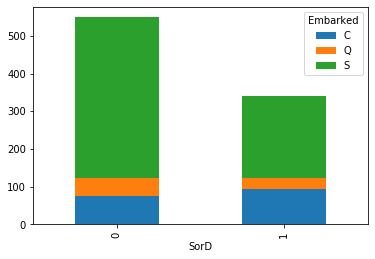

In [65]:
df = pd.DataFrame({'SorD':All_train['Survived'],'Embarked':All_train['Embarked']}) 
ct = pd.crosstab(df.SorD, df.Embarked) 

ct.plot.bar(stacked=True) 

In [66]:
# 테스트셋 X , y 분리
import copy

y_train = data.iloc[:,1]
X_train = copy.deepcopy(data)
X_train.drop("Survived" , axis= 1 , inplace=True)

# 2. 결측치 처리


## 2.1 결측치 확인

In [67]:
print("> Train nan count")
print(X_train.isna().sum())
print()
print("> Test nan count")
print(X_test.isna().sum())

> Train nan count
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> Test nan count
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## 2.2 결측치 처리

### 2.2.1 Fare : 평균값으로 대체

*  값이 0이면 결측치라고 생각하고 처리
*  Pclass의 Fare 평균값으로 대체

In [68]:
X_train.loc[X_train['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [69]:
X_test.loc[X_test['Fare'] == 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


In [70]:
# 0값을 nan값으로 만들고 값을 넣는다
X_train.loc[X_train['Fare'] == 0 , 'Fare'] = float('nan')

means = X_train.groupby('Pclass').Fare.mean()
X_train = X_train.set_index(['Pclass'])
X_train['Fare'] = X_train['Fare'].fillna(means)
X_train = X_train.reset_index()

print(means)

X_test.loc[X_test['Fare'] == 0 , 'Fare'] = float('nan')

X_test = X_test.set_index(['Pclass'])
X_test['Fare'] = X_test['Fare'].fillna(means)
X_test = X_test.reset_index()

Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64


### 2.2.2 Cabin : 값의 유무로 대체

원래 데이터에 cabin이 있었다면 1, 없었다면 0

In [71]:
# X_train.drop("Cabin" , axis = 1 , inplace=True)
# X_test.drop("Cabin" , axis = 1 , inplace=True)
X_train['Has_Cabin'] = X_train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
X_test['Has_Cabin'] = X_test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

X_train.drop("Cabin" , axis = 1 , inplace=True)
X_test.drop("Cabin" , axis = 1 , inplace=True)

### 2.2.3 Age : 평균값으로 대체

호칭의 평균 나이로 대체

* Mr. 성인 남성
* Mrs. 결혼을 한 여성
* Ms. 결혼 여부를 밝히고 싶지 않을 때 사용하는 여성 호칭
* Miss 결혼을 하지 않은 여성
* Master (Mstr.) 결혼을 하지 않은 남성. 주로 청소년 이하

In [72]:
X_train.head()

,Pclass,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,3,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,3,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [73]:
# 이름을 Mr, Mss 들 로만
f = lambda x : x.split(",")[1].split(".")[0].strip()
X_train['Name'] = X_train['Name'].apply(f)
X_test['Name'] = X_test['Name'].apply(f)


In [74]:
print("> 호칭 별 사람 수")
X_train['Name'].value_counts()

> 호칭 별 사람 수


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Mme               1
the Countess      1
Don               1
Sir               1
Lady              1
Ms                1
Capt              1
Jonkheer          1
Name: Name, dtype: int64

In [75]:
print("> 이상치 확인")
X_train.loc[(X_train['Sex']=='male') & (X_train['Name'] =="Mrs")]
X_train.loc[(X_train['Sex']=='male') & (X_train['Name'] =="Miss")]
X_train.loc[(X_train['Sex']=='female') & (X_train['Name'] =="Mr")]
X_train.loc[(X_train['Sex']=='female') & (X_train['Name'] =="Master")]

> 이상치 확인


,Pclass,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin


In [76]:
# Age의 결측치들을 이름의 평균 나이로 넣어준다
means = X_train.groupby('Name').Age.mean()
print("> 호칭 별 나이 평균")
print(means)

X_train = X_train.set_index(['Name'])
X_train['Age'] = X_train['Age'].fillna(means)
X_train = X_train.reset_index()
#위의 코드는 Name을 기준으로 Age값의 평균을 구한다음 그 평균값들을 맞는 Name에 Nan값에 넣어주는 코드


X_test = X_test.set_index(['Name'])
X_test['Age'] = X_test['Age'].fillna(means)
X_test = X_test.reset_index()

> 호칭 별 나이 평균
Name
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


In [77]:
X_test.head()

,Name,Pclass,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,Mr,3,892,male,34.5,0,0,330911,7.8292,Q,0
1,Mrs,3,893,female,47.0,1,0,363272,7.0000,S,0
2,Mr,2,894,male,62.0,0,0,240276,9.6875,Q,0
3,Mr,3,895,male,27.0,0,0,315154,8.6625,S,0
4,Mrs,3,896,female,22.0,1,1,3101298,12.2875,S,0


In [78]:
print("> 평균값으로 모두 채운 것 확인\n")
X_train['Age'].fillna(0)
X_test['Age'].fillna(0)
print(X_train.loc[X_train['Age'] == 0])
print(X_train.loc[X_train['Age'] == 0])

> 평균값으로 모두 채운 것 확인

Empty DataFrame
Columns: [Name, Pclass, PassengerId, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, Has_Cabin]
Index: []
Empty DataFrame
Columns: [Name, Pclass, PassengerId, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, Has_Cabin]
Index: []


### 2.2.4 Embarked : 최빈값으로 대체

In [79]:
# Embarked에는 결측치가 2개 뿐이라서 최빈값으로 결측치를 채웠다.

X_train['Embarked'].fillna(X_train['Embarked'].mode()[0] , inplace=True)

In [80]:
print(X_train.isna().sum())
X_train.head()

Name           0
Pclass         0
PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


,Name,Pclass,PassengerId,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,Mr,3,1,male,22.0,1,0,A/5 21171,7.2500,S,0
1,Mrs,1,2,female,38.0,1,0,PC 17599,71.2833,C,1
2,Miss,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,Mrs,1,4,female,35.0,1,0,113803,53.1000,S,1
4,Mr,3,5,male,35.0,0,0,373450,8.0500,S,0


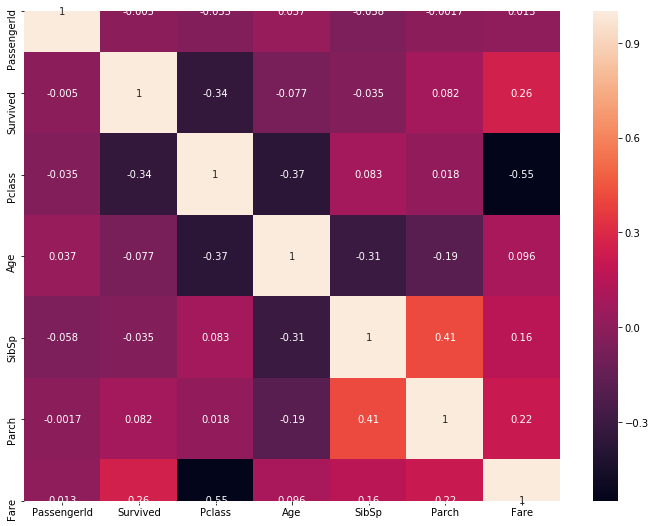

In [81]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True)

# 3. 생사와 무관해 보이는 데이터 삭제 : PassengerId , Name , Ticket

In [83]:
# 그래프도 그렇고 상관관계도 그렇고 PassengerId는 빼도 될거같다는 느낌이
X_train.drop("PassengerId" , axis = 1 , inplace=True)
X_test.drop("PassengerId" , axis = 1 , inplace=True)

# 이름도 Sex로인해 성별 구별하니 지워도 될듯
X_train.drop("Name" , axis = 1 , inplace=True)
X_test.drop("Name" , axis = 1 , inplace=True)


X_train.drop("Ticket" , axis= 1 , inplace=True)
X_test.drop("Ticket" , axis= 1 , inplace=True)

StandardScaler 나 MinMaxScaler가 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.
이상치 처리를 안했기 때문에 스케일링 작업을 하지 않았다.

# 4. Categorical variables 를 Numeric Variables 로 변환

## 4.1 Sex : 

In [84]:
X_train['Sex'] = X_train['Sex'].map( {'male':1, 'female':0} )
X_test['Sex'] = X_test['Sex'].map( {'male':1, 'female':0} )


## 4.2 Embarked : one hot encoding

In [85]:
# X_train
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

#a decision tree can be learned directly from categorical data with no data transform required (this depends on the specific implementation).
# 그럼 랜덤포레스트에서도 안바꿔줘도 상관없는건가?

,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,0,1
1,1,0,38.0,1,0,71.2833,1,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,0,1


# 5. 모델링

## 5.1 데이터셋 준비

* train set을 7 : 3 으로 나눠서 validiation set을 생성

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

trnx, valx, trny, valy = train_test_split(X_train, y_train, test_size=0.3, random_state=510)

## 5.2 모델 선택

| <h2><center>모델</center></h2> | <h2><center>장점</center></h2> | <h2><center>단점</center></h2> | 
|-------------------|:------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------:| 
| **랜덤 포레스트** | 이상치에 강건(robust)하다 | 텍스트 데이터 같은 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다 | 
| "  | 하이퍼 파라미터 조정 없이 기본 설정으로도 좋은 결과를 만들어줄 때가 많다 | 많은 트리를 만들수록 많은 메모리와 긴 훈련 시간을 요구한다 | 
| " | 데이터의 스케일을 맞출 필요가 없다 |  | 
| **그래디언트 부스팅** | 이상치에 강건(robust)하다 | 적절한 하이퍼 파라미터를 찾기 위한 튜닝시간이 길다 | 
| " | 하이퍼 파라미터를 잘 조정한다면 높은 정확도를 낸다 | 랜덤 포레스트보다 오버피팅의 위험이 더 높다 | 
| " | 데이터의 스케일을 맞출 필요가 없다 | |   
| **서포트 벡터 머신** | 데이터 특성이 몇개 되지 않더라도 복잡한 결정 경계를 만들 수 있다. | 데이터 전처리와 매개변수 설정에 따라 정확도가 다르기 때문에 신경을 많이 써야한다 (scailing) |

### 5.2.1 GradientBoosting

In [88]:

param = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

CV_rfc = GridSearchCV(estimator=GradientBoostingClassifier(random_state = 42), param_grid=param, cv= 5)
CV_rfc.fit(trnx,trny)
CV_rfc.best_params_ , CV_rfc.best_score_

In [89]:
forest = GradientBoostingClassifier(loss = "deviance" , learning_rate = 0.2 , criterion = 'friedman_mse' , max_depth = 3 , max_features = 'log2' , min_samples_leaf = 0.1 , min_samples_split = 0.31818181818181823 , n_estimators = 10 , subsample = 0.95)
forest.fit(trnx,trny)

print("train : {} ".format(forest.score(trnx,trny)))

print("validation : {} ".format(forest.score(valx,valy)))

train : 0.7913322632423756 
validation : 0.7761194029850746 


### 5.2.2 RandomForest

In [115]:

param= {
          'n_estimators': [300, 400, 500, ],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth': [3,4,5,6,8 ]
 }

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state = 42), param_grid=param, cv= 5)
CV_rfc.fit(trnx,trny)
CV_rfc.best_params_ , CV_rfc.best_score_

({'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 0.8282504012841091)

In [92]:

forest = RandomForestClassifier(n_estimators = 500, random_state = 42 , max_depth=8, max_features='auto')
forest.fit(trnx,trny)

print("train : {} ".format(forest.score(trnx,trny)))

print("validation : {} ".format(forest.score(valx,valy)))


train : 0.9229534510433387 
validation : 0.7910447761194029 


## 5.3 최종 모델 적용

In [93]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 400, random_state = 42 , max_depth=8, max_features='auto')
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [94]:
result = forest.predict(X= X_test)

submission = pd.DataFrame({"PassengerId":test_PassengerId  , "Survived" : result})


submission[:10]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [95]:
submission.to_csv("./data/result.csv" ,index=False)

# 5.4 특성 중요도

In [96]:

print("특성 중요도 : \n{}".format(forest.feature_importances_))

feature_importances = pd.DataFrame(forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances


# 랜덤포레스트의 장점 중 하나는 각 독립 변수의 중요도(feature importance)를 계산할 수 있다는 점이다.
# 포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 
# 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다.


특성 중요도 : 
[0.09971134 0.35675923 0.17315173 0.05117964 0.03891019 0.17154221
 0.06420081 0.01543297 0.00983961 0.01927227]


,importance
Sex,0.356759
Age,0.173152
Fare,0.171542
Pclass,0.099711
Has_Cabin,0.064201
SibSp,0.051180
Parch,0.038910
Embarked_S,0.019272
Embarked_C,0.015433
Embarked_Q,0.009840


In [100]:
data = pd.read_csv('./data/train.csv')

print("> Sex와 Age의 중요성 검증\n")

print("Pclass 1에 탄 20대 여성")
print(data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 1 ) & (data['Age'] >=20) & ( data['Age'] < 30) ]['Survived'].value_counts())

print("Pclass 1에 탄 여성")
print(data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 1 ) ]['Survived'].value_counts())



> Sex와 Age의 중요성 검증

Pclass 1에 탄 20대 여성
1    15
0     1
Name: Survived, dtype: int64
Pclass 1에 탄 여성
1    91
0     3
Name: Survived, dtype: int64


# 6. 개선사항

## 6.1 Cabin

Cabin의 결측치를 잘 예측해서 넣으면 성능이 좋아질 것 같다.

In [109]:
data = pd.read_csv('./data/train.csv')
X_test = pd.read_csv('./data/test.csv')

y_train = data.iloc[:,1]
X_train = copy.deepcopy(data)

In [110]:

f = lambda x : str(x)[0]
X_train['Cabin'] = X_train.loc[pd.notnull(X_train['Cabin']) ,'Cabin'].apply(f)
X_test['Cabin'] = X_test['Cabin'].apply(f)


X_train.loc[pd.notnull(X_train['Cabin'])].head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D,C


In [111]:
C = X_train.loc[X_train['Cabin']=='C']
D = X_train.loc[X_train['Cabin']=='D']
E = X_train.loc[X_train['Cabin']=='E']
F = X_train.loc[X_train['Cabin']=='F']
G = X_train.loc[X_train['Cabin']=='G']
A = X_train.loc[X_train['Cabin']=='A']
B = X_train.loc[X_train['Cabin']=='B']
T = X_train.loc[X_train['Cabin']=='T']


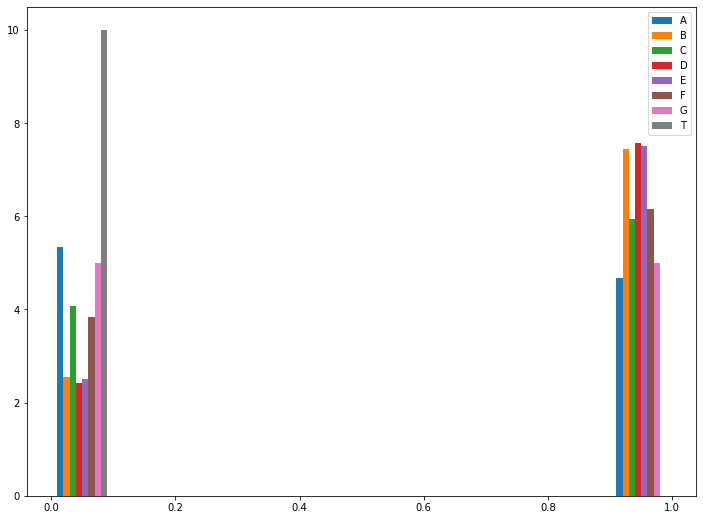

In [112]:
# plt.hist([A['Pclass'] , B['Pclass'] , C['Pclass'] , D['Pclass'] , E['Pclass'] , F['Pclass'] , G['Pclass'] , T['Pclass']] , density = True)
plt.figure(figsize=(12, 9))
plt.hist([A['Survived'] , B['Survived'] , C['Survived'] , D['Survived'] , E['Survived'] , F['Survived'] , G['Survived'] , T['Survived']] , density = True)

plt.legend(['A' , 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.show()



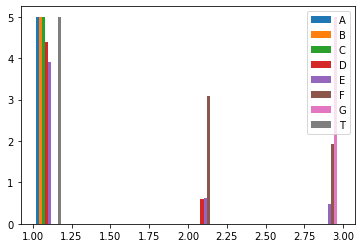

In [113]:
plt.hist([A['Pclass'] , B['Pclass'] , C['Pclass'] , D['Pclass'] , E['Pclass'] , F['Pclass'] , G['Pclass'] , T['Pclass']] , density = True)

plt.legend(['A' , 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.show()

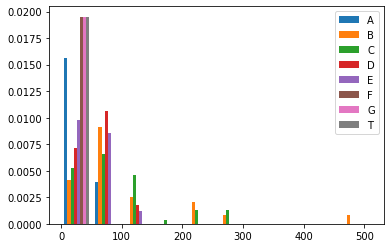

In [114]:
plt.hist([A['Fare'] , B['Fare'] , C['Fare'] , D['Fare'] , E['Fare'] , F['Fare'] , G['Fare'] , T['Fare']] , density = True)

plt.legend(['A' , 'B', 'C', 'D', 'E', 'F', 'G', 'T'])
plt.show()

## 6.2 Outliers

이상치 처리를 좀 더 신중하게 하면 성능이 좋아질 것 같다.

In [115]:
Male_train = X_train.loc[X_train['Sex']=='male']
Female_train = X_train.loc[X_train['Sex']=='female']

Male_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
